<a href="https://colab.research.google.com/github/SuhailAhmad1/Machine_learning/blob/main/Classification_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Important Libraries**

In [122]:
import numpy as np
from pprint import pprint
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, RandomizedSearchCV, train_test_split
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [91]:
#scipy
from scipy.stats import loguniform


# **SGDClassifier "loss = log" for BinaryClassification | 0 detector**

In [92]:
X_pd,y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X_pd.to_numpy()
y = y_pd.to_numpy()

**Preprocessing**

In [93]:
X = MinMaxScaler().fit_transform(X)

In [94]:
X.shape

(70000, 784)

In [95]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

**Splitting data**

In [96]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Changing labels to 2 classes , 1 for zero and 0 for others**

In [97]:
y_train_0 = np.zeros(len(y_train))
y_test_0 = np.zeros(len(y_test))

index_0 = np.where(y_train == '0')
y_train_0[index_0] = 1

index_0 = np.where(y_test == '0')
y_test_0[index_0] = 1

In [98]:
y_train[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [99]:
y_train_0[:10]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

**Using Baseline Model | Dummy Classifier**

In [100]:
d_cls = DummyClassifier(strategy='most_frequent')
d_cls.fit(X_train, y_train_0)

DummyClassifier(strategy='most_frequent')

In [101]:
d_cls.score(X_train, y_train_0)

0.9012833333333333

**Using Logistic Regression**



In [ ]:
bin_sgd_clf = SGDClassifier(loss="log", 
                            penalty="l2", 
                            alpha=0,
                            max_iter=1, 
                            eta0=0.01, 
                            learning_rate="constant",
                            warm_start=True,
                            random_state = 1729)
loss = []
for i in range(100):
  bin_sgd_clf.fit(X_train,y_train_0)
  y_pred = bin_sgd_clf.predict_proba(X_train)
  loss.append(log_loss(y_train_0,y_pred))
  

**Visualizing Loss**

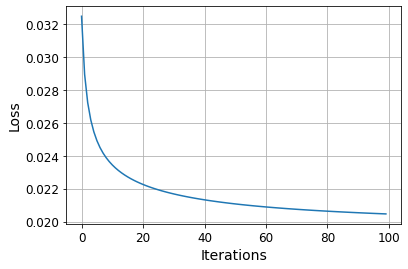

In [135]:
plt.figure()
plt.plot(np.arange(100), loss)
plt.grid(True)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [106]:
print("Training Accuracy : ", bin_sgd_clf.score(X_train, y_train_0))
print("Test Accuracy : ", bin_sgd_clf.score(X_test,y_test_0))

Training Accuracy :  0.99395
Test Accuracy :  0.9919


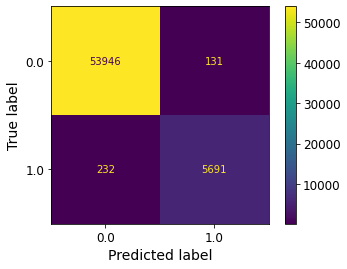

In [124]:
cm_display = ConfusionMatrixDisplay.from_estimator(bin_sgd_clf, X_train, y_train_0, values_format=".5g")

In [108]:
cm_display.confusion_matrix

array([[53946,   131],
       [  232,  5691]])

In [115]:
print(classification_report(y_train_0, bin_sgd_clf.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54077
         1.0       0.98      0.96      0.97      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.98      0.98     60000
weighted avg       0.99      0.99      0.99     60000



Cross Checking for Generalization using CrossValidation

In [117]:
estimator = SGDClassifier(loss="log",
                          penalty="l2",
                          max_iter=100,
                          warm_start=True,
                          eta0=0.01,
                          alpha=0,
                          learning_rate='constant',
                          random_state=1729)


In [119]:
cv_bin_clf = cross_validate(estimator, X_train, y_train_0, cv=5,
                            scoring=['precision', 'recall', 'f1'],
                            return_estimator=True,
                            return_train_score=True)
pprint(cv_bin_clf)

{'estimator': [SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729, warm_start=True),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729, warm_start=True),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729, warm_start=True),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729, warm_start=True),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729, warm_start=True)],
 'fit_time': array([1.44521356, 1.41858101, 1.40237188, 1.54896832, 1.29621434]),
 'score_time': array([0.04174471, 0.05250907, 0.04041624, 0.04020309, 0.04077125]),
 'test_f1': array([0.95699831, 0.954371  , 0.9616041 , 0.95870583, 0.9599

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


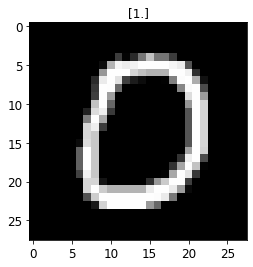

In [128]:
plt.imshow(X_test[10,:].reshape(28,28),cmap='gray')
plt.title(bin_sgd_clf.predict(X_test[10].reshape(1,-1)))
plt.show()

**PR Curve**

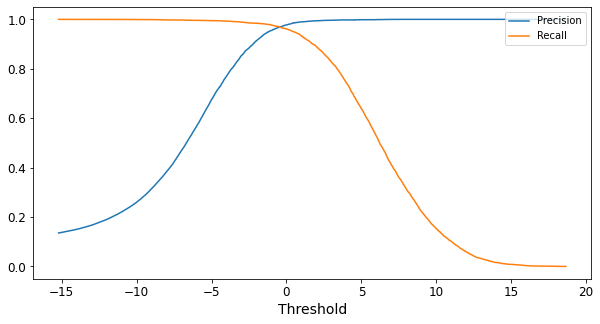

In [140]:
y_scores = bin_sgd_clf.decision_function(X_train)
precisons, recalls, threshholds = precision_recall_curve(y_train_0, y_scores)
plt.figure(figsize=(10,5))
plt.plot(threshholds, precisons[:-1], label="Precision")
plt.plot(threshholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper right")
plt.show()